# Projet : Modèle de Machine Learning pour prédier le score de qualité d' un vin

##### imopretation des bibliotique 

In [165]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  #, LinearSVC
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
#from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error



In [166]:
df1=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=";")
df1["type_vin"]=0
df2["type_vin"]=1
df=pd.concat([df1, df2])
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_vin              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [168]:
df["quality"].value_counts(normalize=True)

6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: quality, dtype: float64

# Analyse exploratoire

In [169]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [170]:
# pas de donner manquante 
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_vin                0
dtype: int64

#### supposon que un vin qui est une qality> 7 est un bon vin et vire se vire ça 

In [171]:
df3=df[df["quality"]>7]
df3.head()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 267 to 4802
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         198 non-null    float64
 1   volatile acidity      198 non-null    float64
 2   citric acid           198 non-null    float64
 3   residual sugar        198 non-null    float64
 4   chlorides             198 non-null    float64
 5   free sulfur dioxide   198 non-null    float64
 6   total sulfur dioxide  198 non-null    float64
 7   density               198 non-null    float64
 8   pH                    198 non-null    float64
 9   sulphates             198 non-null    float64
 10  alcohol               198 non-null    float64
 11  quality               198 non-null    int64  
 12  type_vin              198 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 21.7 KB


In [172]:
df3["quality"].value_counts(normalize=True)

8    0.974747
9    0.025253
Name: quality, dtype: float64

In [173]:
df3.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,6.850000,0.291187,0.333889,5.351010,0.040778,34.505051,117.479798,0.992487,3.225354,0.511313,11.691414,8.025253,0.909091
std,1.144918,0.118123,0.102157,4.161541,0.015679,17.084070,41.693584,0.002883,0.156431,0.164466,1.273262,0.157289,0.288209
min,3.900000,0.120000,0.030000,0.800000,0.014000,3.000000,12.000000,0.987130,2.880000,0.250000,8.500000,8.000000,0.000000
25%,6.200000,0.210000,0.280000,2.000000,0.030250,24.000000,96.000000,0.990350,3.130000,0.380000,11.000000,8.000000,1.000000
50%,6.800000,0.275000,0.320000,4.050000,0.036500,34.000000,118.500000,0.991780,3.230000,0.480000,12.000000,8.000000,1.000000
75%,7.300000,0.350000,0.367500,7.575000,0.045000,43.000000,145.000000,0.994075,3.330000,0.600000,12.600000,8.000000,1.000000
max,12.600000,0.850000,0.740000,14.800000,0.121000,105.000000,212.500000,1.000600,3.720000,1.100000,14.000000,9.000000,1.000000


In [174]:
df4=df[df["quality"]<=7]
#df4.head()
#df4.info()

In [175]:
df4.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
count,6299.000000,6299.000000,6299.000000,6299.000000,6299.000000,6299.000000,6299.00000,6299.000000,6299.000000,6299.000000,6299.000000,6299.000000,6299.000000
mean,7.226790,0.341190,0.318154,5.446134,0.056513,30.400222,115.69003,0.994766,3.218285,0.531896,10.454093,5.749008,0.749008
std,1.299327,0.165664,0.146449,4.775601,0.035365,17.756761,56.92701,0.002976,0.160930,0.148258,1.170431,0.792368,0.433618
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,76.00000,0.992400,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.048000,29.000000,118.00000,0.994990,3.210000,0.510000,10.200000,6.000000,1.000000
75%,7.700000,0.410000,0.390000,8.100000,0.066000,41.000000,156.00000,0.997000,3.320000,0.600000,11.200000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.00000,1.038980,4.010000,2.000000,14.900000,7.000000,1.000000


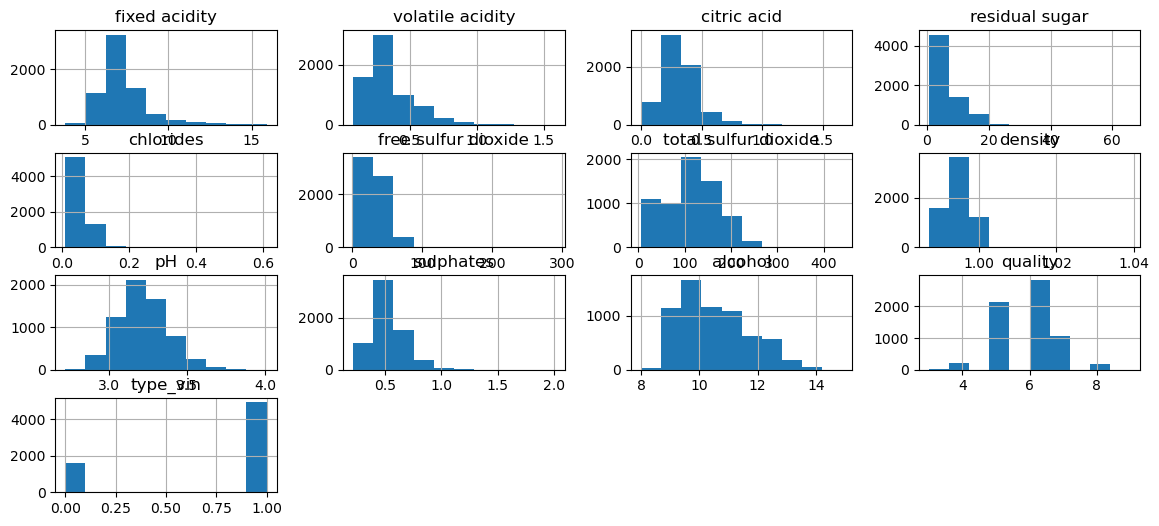

In [176]:
df.hist(figsize=(14,6));

In [177]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


<AxesSubplot:>

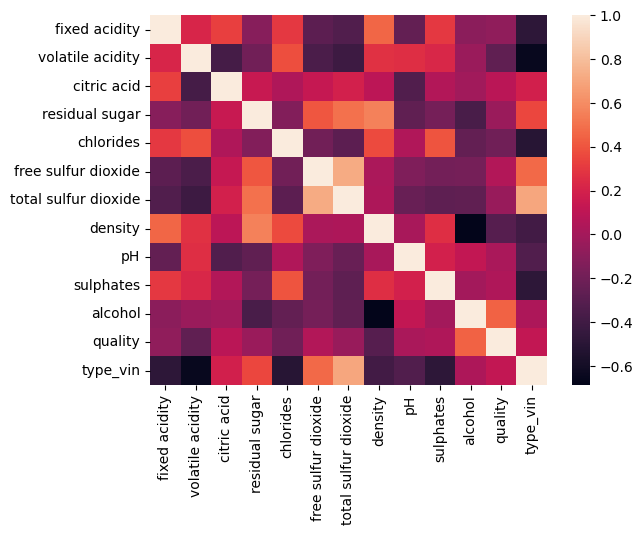

In [178]:
sns.heatmap(df.corr())

##### prétraitement 

In [179]:
x=df.drop("quality",axis=1)
y=df["quality"]
seed=33
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=seed,test_size=0.2)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)


x_train.shape= (5197, 12)
y_train.shape= (5197,)
x_test.shape= (1300, 12)
y_test.shape= (1300,)


In [180]:
scaler=StandardScaler()
x_train_scaller=scaler.fit_transform(x_train)
x_test_scaller=scaler.fit_transform(x_test)

In [181]:
x_train_scaller

array([[ 0.38106424, -0.42333744,  0.152051  , ..., -0.35328639,
         1.35085185,  0.57046226],
       [ 1.62710737,  1.9359534 , -0.40374927, ..., -0.75380179,
        -0.74429444, -1.75296435],
       [-1.56587815,  0.15882524, -1.65429985, ..., -0.9540595 ,
        -0.49287688,  0.57046226],
       ...,
       [ 1.23771889,  0.80226819,  1.19417649, ...,  0.44774442,
        -0.57668273, -1.75296435],
       [-1.33224506, -0.66845857, -0.89007449, ..., -0.68704923,
        -0.07384762,  0.57046226],
       [ 0.30318655, -0.05565575,  0.22152603, ..., -0.9540595 ,
         1.267046  ,  0.57046226]])

In [182]:
'''lr_cve=cross_val_score(
    linearRegession(),
    x_train_scalle,
    y_train,
    cv=3,
    scoring="neg_root_mean_squarederor"
)
rf_cve=cross_val_score(
    RandomForestRegressor(random_state=seed),
    x_train_scalle,
    y_train,
    cv=3,
    scoring="neg_root_mean_squarederor"
) 
svm_cve=cross_val_score(
    SVR(),
    x_train_scalle,
    y_train,
    cv=3,
    scoring="neg_root_mean_squarederor"
)'''


lr_cve = cross_val_score(
    LinearRegression(),
    x_train_scaller,
    y_train,
    cv=3,
    scoring="neg_root_mean_squared_error"
)
rf_cve = cross_val_score(
    RandomForestRegressor(random_state=seed),
    x_train_scaller,
    y_train,
    cv=3,
    scoring="neg_root_mean_squared_error"
)
svm_cve = cross_val_score(
    SVR(),
    x_train_scaller,
    y_train,
    cv=3,
    scoring="neg_root_mean_squared_error"
)

    


In [183]:
lr_cve

array([-0.73253584, -0.73110956, -0.72582852])

In [184]:
svm_cve

array([-0.67342125, -0.68136856, -0.67191249])

In [185]:
rf_cve

array([-0.61999819, -0.63805642, -0.63653862])

In [186]:
print("RF :",rf_cve.mean(),"LR :",lr_cve.mean(),"SVM :",svm_cve.mean())

RF : -0.6315310729487997 LR : -0.7298246371416165 SVM : -0.6755674351926579


##### Construction du modéle

In [187]:
model=RandomForestRegressor(random_state=seed)
model.fit(x_train_scaller,y_train)

RandomForestRegressor(random_state=33)

In [188]:
y_pred=model.predict(x_test_scaller)

In [189]:
y_pred

array([6.24, 5.79, 6.26, ..., 5.48, 5.19, 4.88])

In [190]:
mean_squared_error(y_test,y_pred,squared=False)

0.6519818307992238

In [191]:
7+0.63

7.63

In [192]:
7-0.63

6.37

##### Conclusion Attribus importants

In [193]:
model.feature_importances_

array([0.05454458, 0.12879879, 0.06024374, 0.0741437 , 0.06598887,
       0.08299385, 0.07285924, 0.05762696, 0.07001149, 0.07477392,
       0.25612737, 0.00188747])

In [194]:
vars_imp=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=0)
vars_imp             

alcohol                 0.256127
volatile acidity        0.128799
free sulfur dioxide     0.082994
sulphates               0.074774
residual sugar          0.074144
total sulfur dioxide    0.072859
pH                      0.070011
chlorides               0.065989
citric acid             0.060244
density                 0.057627
fixed acidity           0.054545
type_vin                0.001887
dtype: float64

###### donc pour produier des vines de bonnne qualié il faut agier ces les premier 4 parameter quellque soit le type de vin :
alcohol                 
volatile acidity        
free sulfur dioxide     
sulphates  


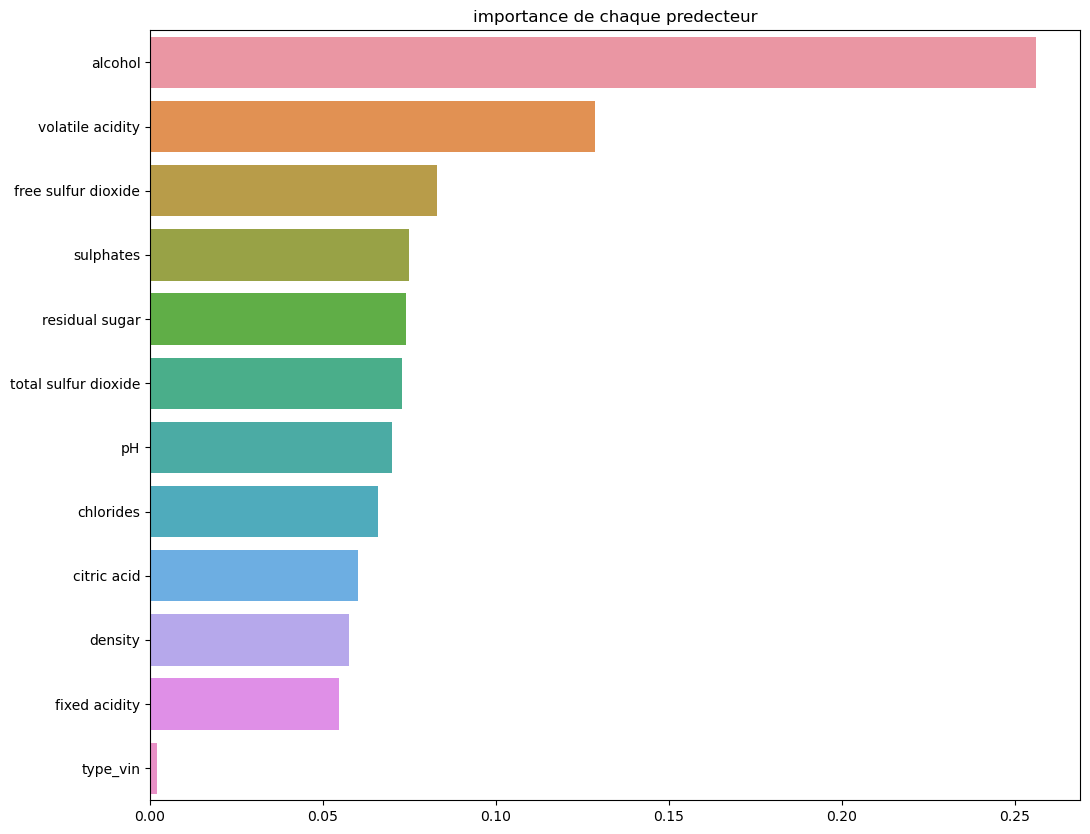

In [195]:
plt.figure(figsize=(12,10))
sns.barplot(x=vars_imp,y=vars_imp.index);
plt.title("importance de chaque predecteur")
plt.show()